In [33]:
import json
with open('../data/face_boxes.json') as f:
    boxes = json.load(f)

In [34]:
len(boxes)

7092

In [1]:
from tqdm import tqdm
import cv2 as cv
import numpy as np
from utils import locate_face
with open('../data/raw_data/WebFaces_GroundThruth.txt') as f:
    faces = f.readlines()
all = []
for face in faces:
    all.append(tuple(face.strip().split(' ')))

height = []
width = []
frac = []
path = 'D:/my/study/code/Face_detection/data/raw_data/Caltech_WebFaces/'
for picture, *coordinates in tqdm(all):
    img = cv.imread(cv.samples.findFile(path+picture))
    x, y, w, h = locate_face(img, [float(x) for x in coordinates])
    frac.append(h/w)
    # height.append(img.shape[1])
    # width.append(img.shape[0])

100%|██████████| 10524/10524 [00:19<00:00, 542.05it/s]


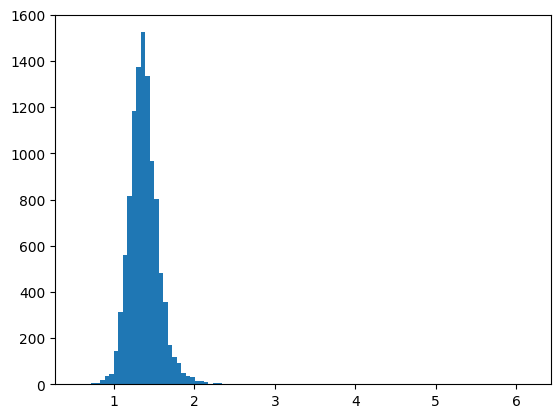

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(frac, 100)
plt.show()

In [3]:
np.mean(np.array(frac))

1.370289305531438

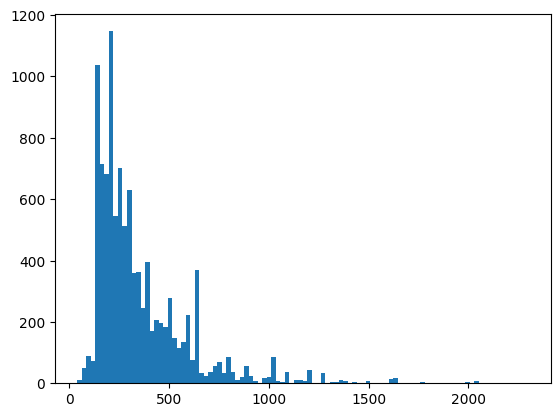

In [66]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(height, 100)
plt.show()

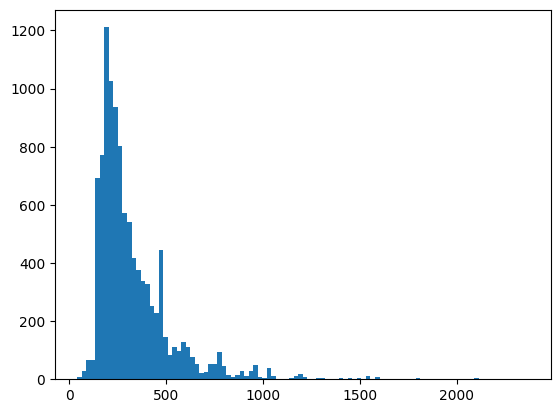

In [67]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.hist(width, 100)

plt.show()

In [11]:
import cv2 as cv
import numpy as np
from tqdm import tqdm
from utils import compute_all_haar_features
images = np.random.rand(4, 48, 48)
sub_windows_size = (6, 8, 10)
window_target_size = (24, 24)
image_target_size = (48, 48)
window_stride = 1
haar_stride = 12
for image in images:
    for window_size in sub_windows_size:
        for x in tqdm(range(0, image_target_size[0]-window_size+1, window_stride)):
            for y in range(0, image_target_size[1]-window_size+1, window_stride):
                sub_window = cv.resize(
                    image[x:x+window_size, y:y+window_size], window_target_size)
                haar_feature = compute_all_haar_features(
                    sub_window, haar_stride).reshape(1, -1)

 13%|█▎        | 5/39 [00:01<00:06,  5.02it/s]

In [4]:
import json
path = 'D:/my/study/code/Face_detection/data/'
with open(path + 'face_boxes.json') as f:
    boxes = json.load(f)
with open(path + 'test_index.json') as f:
    test_index = json.load(f)

count = 0
for image_index in test_index:
    count += len(boxes[image_index])

In [5]:
count

2249